In [33]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Load Data from CSV file

In [3]:
df = pd.read_csv(r"C:\Users\preet\Documents\AdvertisingData\Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

### Created scatter plot comparing TV Advertising Investment to Sales 

Text(10, -70, 'Radio: for about every 10 dollars investment you get about 8 dollars in sales')

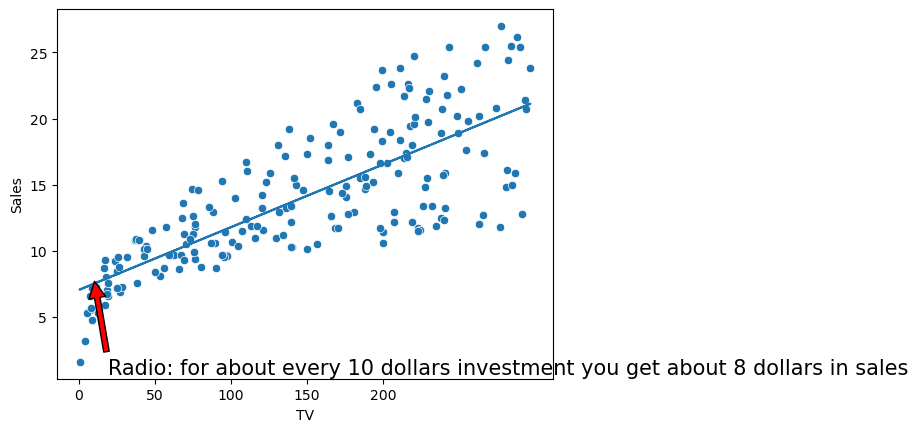

In [68]:
sns.scatterplot(data=df, x="TV", y="Sales")
plt.xticks([0,50,100,150,200])
x = df["TV"]
y = df["Sales"]
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
plt.plot(x,slope*x+intercept)
point_to_annotate = (10, 8)  # Replace with your actual data point coordinates
annotation_text = "Radio: for about every 10 dollars investment you get about 8 dollars in sales"  # Corrected text for clarity
plt.annotate(annotation_text, xy=point_to_annotate, xytext=(10, -70),  # Adjust text position
             textcoords="offset points", fontsize=15,  # Set font size for better visibility
             arrowprops=dict(facecolor='red', shrink=0.05))  # Customize arrow

### Created scatter plot comparing Newspaper Advertising Investment to Sales 

Text(10, -80, 'Radio: for about every 10 dollars investment you get about 10 dollars in sales')

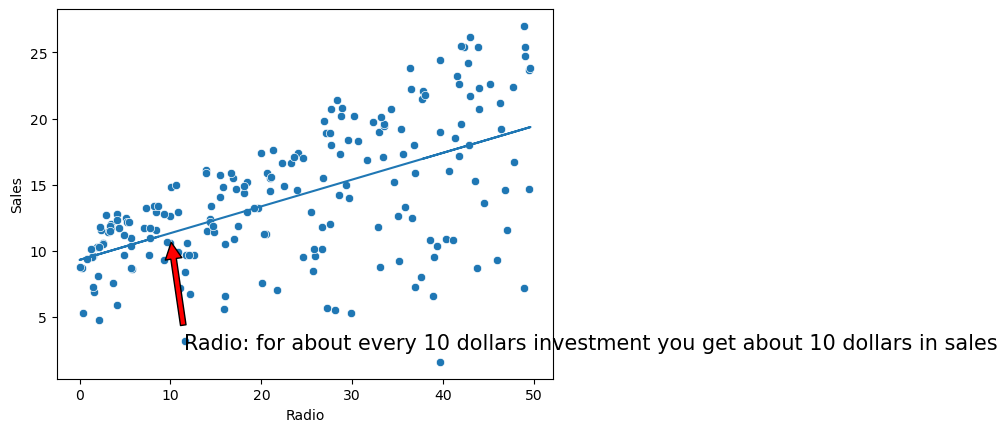

In [61]:
sns.scatterplot(data=df, x="Radio", y="Sales")
plt.xticks([0,10,20,30,40,50])
x = df["Radio"]
y = df["Sales"]
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
plt.plot(x,slope*x+intercept)
point_to_annotate = (10, 11)  # Replace with your actual data point coordinates
annotation_text = "Radio: for about every 10 dollars investment you get about 10 dollars in sales"  # Corrected text for clarity
plt.annotate(annotation_text, xy=point_to_annotate, xytext=(10, -80),  # Adjust text position
             textcoords="offset points", fontsize=15,  # Set font size for better visibility
             arrowprops=dict(facecolor='red', shrink=0.05))  # Customize arrow

### No Linear Model can fit this data so Newspaper advertisement investment will not be used in linear model

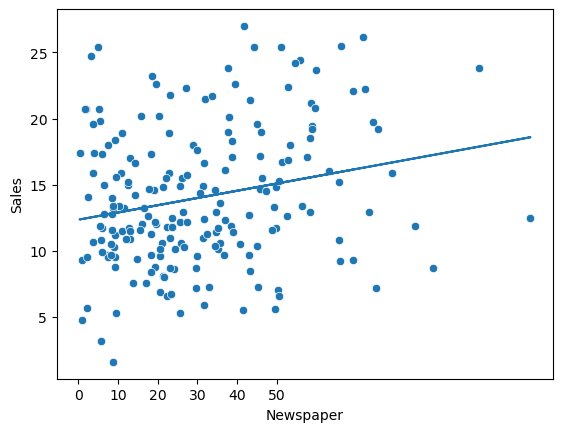

In [41]:
sns.scatterplot(data=df, x="Newspaper", y="Sales")
plt.xticks([0,10,20,30,40,50])
x = df["Newspaper"]
y = df["Sales"]
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
plt.plot(x,slope*x+intercept)

### Creating the predictive linear model

In [70]:
reg = LinearRegression()

In [71]:
reg.fit(df[['TV','Radio']], df.Sales)

LinearRegression()

In [73]:
reg.predict([[230,38]])

array([20.588488])

In [12]:
df.head(89)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
84,85,213.5,43.0,33.8,21.7
85,86,193.2,18.4,65.7,15.2
86,87,76.3,27.5,16.0,12.0
87,88,110.7,40.6,63.2,16.0


### Now to prove my prediction model works I will be taking a sample line from the original data shown below

In [74]:
display(df.iloc[88])

Unnamed: 0    89.0
TV            88.3
Radio         25.5
Newspaper     73.4
Sales         12.9
Name: 88, dtype: float64

In [76]:
reg.predict([[88.3,25.5]])

array([11.75510286])

### I got 11.755 in sales from my model which is pretty close to the original data where sales was 12.9